# Q-Learning Agent for Frozen Lake Environment

## Overview
In this notebook, we implement a Q-learning agent to navigate a frozen lake environment generated based on user-defined parameters: grid size and the number of holes. The `Environment` class simulates the frozen lake scenario, where the agent receives rewards for reaching the goal while avoiding holes. The agent's performance will be analyzed through its learning process. Additionally, we initialize a Q-table to store the expected rewards for different actions. The notebook also includes a display function to visualize the current state of the grid and further operations related to the environment.


In [24]:
import numpy as np
from numpy.random import choice as random_choice

# Action map and movement dictionary
actions = ['Up', 'Right', 'Down', 'Left']
movement = {'R': 1,'L': 3,'U': 0,'D': 2}

class Environment:
    def __init__(self, grid_size, hole_count):
        size = int(np.sqrt(grid_size))
        hole_positions = random_choice(grid_size - 2, hole_count, replace=False) + 1
        
        self.grid = np.ones((size, size))
        self.reward_grid = np.zeros((size, size))
        
        for pos in hole_positions:
            row = int(pos / size)
            col = int(pos % size)
            self.reward_grid[row][col] = -100
            self.grid[row][col] = 0
        
        self.reward_grid[size - 1][size - 1] = 100  # Reward for reaching the goal
        self.grid[0][0] += 70  # Initial state reward
        
        self.current_row = 0
        self.current_col = 0
        self.done = False
        self.size = size

    def reset(self):
        self.grid[self.current_row][self.current_col] %= 70
        self.current_row = 0
        self.current_col = 0
        self.done = False
        self.grid[self.current_row][self.current_col] += 70
        return 0
    
    def step(self, action):
        self.grid[self.current_row][self.current_col] %= 70
        
        if action == 0:  # Up
            self.current_row -= 1
        elif action == 1:  # Right
            self.current_col += 1
        elif action == 2:  # Down
            self.current_row += 1
        elif action == 3:  # Left
            self.current_col -= 1
            
        current_state = self.size * self.current_row + self.current_col
        reward = self.reward_grid[self.current_row][self.current_col]
        
        if current_state == (self.size * self.size - 1):
            self.done = True
        
        self.grid[self.current_row][self.current_col] += 70
            
        return current_state, reward, self.done
    
    def get_random_action(self):
        if self.current_row == 0:
            if self.current_col == 0:
                return int(random_choice(2, 1) + 1)
            elif self.current_col == self.size - 1:
                return int(random_choice(2, 1) + 2)
            else:
                return int(random_choice(3, 1) + 1)
        elif self.current_row == self.size - 1:
            if self.current_col == 0:
                return int(random_choice(2, 1))
            elif self.current_col == self.size - 1:
                return int(3 * random_choice(2, 1))
            else:
                actions_list = [0, 1, 3]
                return actions_list[int(random_choice(3, 1))]
        elif self.current_col == 0:
            return int(random_choice(3, 1))
        elif self.current_col == self.size - 1:
            actions_list = [0, 2, 3]
            return actions_list[int(random_choice(3, 1))]
        else:
            return int(random_choice(4, 1))
        
    def display(self):
        print(self.grid)

# User input for environment size and number of holes
grid_size = int(input("Enter the size of the grid: "))
hole_count = int(input("Enter the number of holes: "))

# Create the Frozen Lake environment
env = Environment(grid_size, hole_count)
env.display()

# Additional operations (unrelated to the main functionality)
sum=0
for i in range(10):
    sum=sum+2;
    

# Initialize the Q-table
Q_table = np.zeros((grid_size, 4))
# Example assignment to Q-table
Q_table[0][0] = 1
Q_table[1][1] = 2

# Testing the learned policy
# (add your testing code here)

    
        



Enter the size of the grid: 64
Enter the number of holes: 10
[[71.  1.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]]


# Q-Learning Implementation for Frozen Lake Environment

This section of the code initializes and trains a Q-learning agent within the Frozen Lake environment. 
The Q-table is used to store the expected rewards for each state-action pair, which is updated during the training process based on the agent's experience.

## Key Features:
- Initialization of the Q-table with negative values for invalid actions.
- Implementation of the Q-learning algorithm to update Q-values.
- Exploration-exploitation strategy to balance learning and random action selection.
- Visualization of total rewards obtained by the agent over episodes.

## Training Parameters:
- **Number of episodes:** 4000
- **Learning rate:** 0.7
- **Discount factor:** 0.9


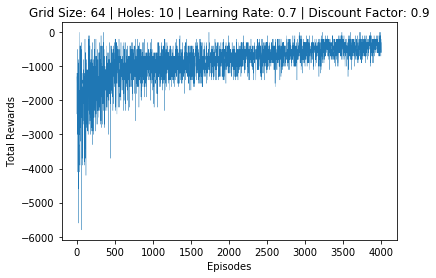

In [25]:
# Initialize the Q-table
Q_table = np.zeros((N, 4))
length = int(np.sqrt(N))

# Set invalid actions to a large negative value
for j in range(length):
    Q_table[j][0] = -1e8
    Q_table[length * (length - 1) + j][2] = -1e8
    
for i in range(length):
    Q_table[length * i][3] = -1e8
    Q_table[length * i + length - 1][1] = -1e8

# Training parameters
num_episodes = 4000
learning_rate = 0.7
discount_factor = 0.9
max_steps_per_episode = length * length * 3

# List to keep track of rewards
total_rewards_list = []

# Training loop
for episode in range(num_episodes):
    state = environment.reset()
    total_reward = 0
    
    for step in range(max_steps_per_episode):
        exploration_prob = random_uniform(0, 1)
        
        if exploration_prob > np.exp(-episode * 5e-4):
            action = np.argmax(Q_table[state, :])
        else:
            action = environment.get_random_action()

        new_state, reward, finished = environment.step(action)

        # Update Q-value using the Q-learning formula
        Q_table[state, action] += learning_rate * (reward + discount_factor * np.max(Q_table[new_state, :]) - Q_table[state, action])
        
        total_reward += reward
        state = new_state
        
        if finished:
            break

    total_rewards_list.append(total_reward)

# Plotting rewards over episodes
plt.plot(total_rewards_list, linewidth=0.3)
plt.ylabel('Total Rewards')
plt.xlabel('Episodes')
plt.title(f'Grid Size: {N} | Holes: {M} | Learning Rate: {learning_rate} | Discount Factor: {discount_factor}')
plt.savefig(f'output/{N}_{M}_{learning_rate}_{discount_factor}.png', dpi=200)

In [27]:
current_state = environment.reset()
step_count = 0

while True:
    step_count += 1
    action = np.argmax(Q_table[current_state, :])
    current_state, reward, finished = environment.step(action)
    
    print('---------------------------------------------------------')
    print(f' Step Number:{step_count}| Action: {actions[action]} ')
    print('----------------------------------------------------------')
    environment.display()
    print()

    if finished:
        break
    if step_count > max_steps_per_episode:
        print('no solution found!')
        break

---------------------------------------------------------
 Step Number:1| Action: Right 
----------------------------------------------------------
[[ 1. 81.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  0.  1.  1.  0.]
 [ 1.  0.  1.  1.  1.  1.  0.  1.]]

---------------------------------------------------------
 Step Number:2| Action: Down 
----------------------------------------------------------
[[ 1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1. 81.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  0.  1.  1.  0.]
 [ 1.  0.  1.  1.  1.  1.  0.  1.]]

---------------------------------------------------------
 Step Number:3| Action: Up 
-------------------------------------------------------